## **Workshop3: Introduction to Sequence Analysis in Bioinformatics**
### $Amirhossein Mohammadipour(Amir.Mp)$
### *Professor : Dr.Reza Rezazadegan*
---

# Introduction:

**Pairwise Sequence Alignment (PSA)**  
→ Comparing two biological sequences (DNA, RNA, or protein) by establishing **residue-to-residue correspondence**, often introducing **gaps (−)** to account for insertions/deletions (indels).

**Goal**:  
Find the **best possible pairing** that **maximizes the agreement** among residues → highest **alignment score**.

**Analogy**  
Like comparing two ancient manuscripts copied from the same original — one missed words, another added notes → we insert blanks and shift text to reveal true similarity.

**Why is PSA fundamental?**  
- Foundation of database searching (BLAST), multiple sequence alignment, and phylogenetic analysis.
- Biological sequences = **sequential data** → can be analyzed with tools like **Transformer neural networks**.

## Subtopic 1: Evolutionary Basis
### Evolutionary Basis of Sequence Alignment - Part 1: What is Evolution?
**Biology Basics**:
- **What’s DNA?** DNA is like an instruction manual for building a living organism.Proteins do the cell’s heavy lifting, like hemoglobin carrying oxygen in blood.
- **How do mutations happen?** Mutations are like typos in DNA:
  - **Substitution**: One letter (base) changes, e.g., A to G.
  - **Deletion**: A letter is removed.
  - **Insertion**: A letter is added.
- **Natural Selection**: Mutations that aid survival are kept (e.g., disease-resistance genes). Harmful ones may be weeded out.

**Why align sequences?** When two species diverge from a common ancestor (e.g., humans and chimps, splitting ~6 million years ago), their sequences remain similar but with small differences. Alignment helps us spot these similarities and estimate evolutionary distance.

**Analogy**: Evolution is like a family tree. Branches are species, and leaves are current DNA sequences. Alignment is like comparing two leaves to trace their shared roots.

**Real Example**: The hemoglobin alpha gene (HBA1) in humans (ID: NM_000558) and chimps (ID: NM_001042626) is over 99% similar, as its oxygen-carrying function is critical, and too many mutations could be lethal.

Next, we’ll dive deeper!

---

In [20]:
# Import libraries
from Bio import Entrez, SeqIO, pairwise2
import matplotlib.pyplot as plt
import numpy as np

# Set email for NCBI
Entrez.email = "amir.mp1384@gmail.com"

# Fetch real sequences: Human and Chimp hemoglobin alpha
handle_human = Entrez.efetch(db="nucleotide", id="NM_000558", rettype="fasta", retmode="text") #Hemoglobin beta:NM_000518 --> 58
seq_human = SeqIO.read(handle_human, "fasta")
handle_chimp = Entrez.efetch(db="nucleotide", id="NM_001042626", rettype="fasta", retmode="text") #Mouse : NM_008220 --> 1042626
seq_chimp = SeqIO.read(handle_chimp, "fasta")

# Simple global alignment (first 100 bases for speed)
alignments = pairwise2.align.globalxx(seq_human.seq[:100], seq_chimp.seq[:100])
best_alignment = alignments[0]

# Print alignment
print("Global Alignment:")
print(pairwise2.format_alignment(*best_alignment))

Global Alignment:
ACTCTTCTGGTCCCCACAGACTCAGAGA-GAACCCACCATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGGGTAAGGTCGGCGCGCAC
|||||||||||||||||||||||||| | ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
ACTCTTCTGGTCCCCACAGACTCAGA-AAGAACCCACCATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGGGTAAGGTCGGCGCGCAC
  Score=99



---

## Subtopic 2: Sequence Homology vs. Sequence Similarity
### Sequence Homology vs. Sequence Similarity - Part 1: Core Concepts
**Biology Basics**:
- **Homology**: Two sequences share a common ancestor, like siblings inheriting traits from parents. Two types:
  - **Orthologs**: Same gene in different species (e.g., hemoglobin in human and mouse).
  - **Paralogs**: Duplicated genes in one species (e.g., hemoglobin alpha and beta in humans).

**Why It Matters**: High similarity (e.g., >70%) often suggests homology, but we need statistics to confirm (more later).

**Real Example**: Human insulin (UniProt: P01308) and mouse insulin (P01325) are homologous, sharing ~80% similarity due to a shared ancestral gene.

Next, we’ll dig deeper!

---

### Homology vs. Similarity - Part 2: Details and Examples

Let’s zoom in. **Similarity** can be measured as a percentage or via alignment scores (e.g., BLOSUM). **Homology** is a biological inference—you can’t calculate it directly, only infer it from similarity.

**Biology Details**:
- **Random Similarity**: In short sequences (e.g., 10 bases), high similarity might be by chance. Example:    
Human: MVLSPADKTN    
Mouse: MVLTPADKTN    

Similarity = 9/10 = 90%. Since they have the same function (e.g., hemoglobin) and species are close, they’re likely homologous.

Best Alignment (Local with scoring matrix):
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
|||....||||||||||.|.|..|||.|||||.||||||||||||||||||||.|||.||.||.|.||||.|  |.||.||||...||||||.|||||||||||||||||
MALLVHFLPLLALLALWEPKPTQAFVKQHLCGPHLVEALYLVCGERGFFYTPKSRREVEDPQVEQLELGGSP--GDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN
  Score=442

Sequence Similarity: 78.18%


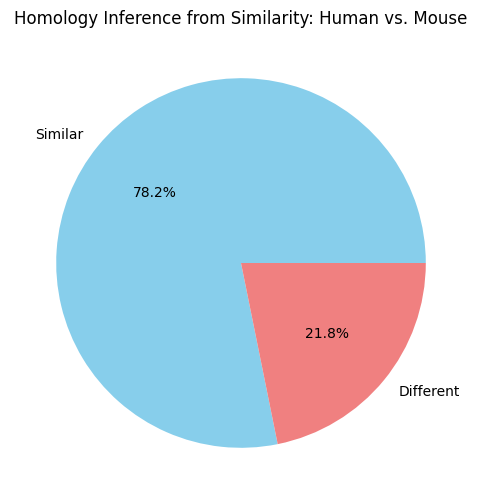

In [ ]:
from Bio import ExPASy, SeqIO, pairwise2
from Bio.Align import substitution_matrices
import matplotlib.pyplot as plt

handle_human = ExPASy.get_sprot_raw("P01308")  # Human insulin
seq_human = SeqIO.read(handle_human, "swiss")
handle_mouse = ExPASy.get_sprot_raw("P01325")  # Mouse insulin
seq_mouse = SeqIO.read(handle_mouse, "swiss")

matrix = substitution_matrices.load("BLOSUM62")  # "PAM250"

alignments = pairwise2.align.localds(
    seq_human.seq,
    seq_mouse.seq,
    matrix,
    -10,   # gap open penalty
    -1     # gap extend penalty
)
best_alignment = alignments[0]

print("Best Alignment (Local with scoring matrix):")
print(pairwise2.format_alignment(*best_alignment))

matches = sum(a == b for a, b in zip(best_alignment[0], best_alignment[1]) if a != '-' and b != '-')
length = len(best_alignment[0].replace('-', ''))
similarity = (matches / length) * 100 if length > 0 else 0
print(f"Sequence Similarity: {similarity:.2f}%")

plt.figure(figsize=(6, 6))
plt.pie(
    [matches, length - matches],
    labels=['Similar', 'Different'],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral']
)
plt.title('Homology Inference from Similarity: Human vs. Mouse')
plt.show()


---

## Subtopic 3: Sequence Similarity vs. Sequence Identity
### Sequence Similarity vs. Sequence Identity - Part 1: Key Differences
**Biology Basics**:
- **Identity**: Number of exact matches in the same positions (e.g., A with A, Ser with Ser).
- **Similarity**: Includes exact matches **and** conservative substitutions (e.g., similar amino acids like valine and isoleucine, both hydrophobic).

**Why They Differ**:
- Identity is strict, great for closely related sequences (e.g., human and chimp).
- Similarity is flexible, accounting for substitutions that preserve function.

**Analogy**: Identity is like copying a recipe word-for-word. Similarity is like swapping sugar for honey—the dish still works.

---

## Similarity vs. Identity - Part 2: Applications and Importance

**Biological Applications**:
- **Identity**: Useful for comparing very similar sequences (e.g., orthologous genes in close species).
- **Similarity**: Key for finding functional regions, as similar amino acids (e.g., acidic or basic) often have similar roles.

**Real Example**: Human hemoglobin (UniProt: P69905) and mouse hemoglobin (NP_032244). Identity might be 85%, but similarity (via BLOSUM) could reach 95% due to conservative substitutions.

**Analogy**: Identity is like two people driving the exact same car (e.g., white Prius). Similarity is like one driving a Prius and another a Civic—both compact and efficient.

**Simple Formulas**:
Identity:
$$ \text{Identity} = \frac{\text{Number of exact matches}}{\text{Length without gaps}} \times 100 $$
Similarity:
$$ \text{Similarity Score} = \sum \text{Matrix score for each pair} $$

**Historical Note**: Margaret Dayhoff introduced similarity via PAM matrices in 1978.

Identity: 90.00%
Similarity (BLOSUM62 positive scores): 100.00%

Identity Alignment:
MVLS-PADKTN
|||  ||||||
MVL-TPADKTN
  Score=9

Similarity Alignment:
MVLSPADKTN
|||.||||||
MVLTPADKTN
  Score=47



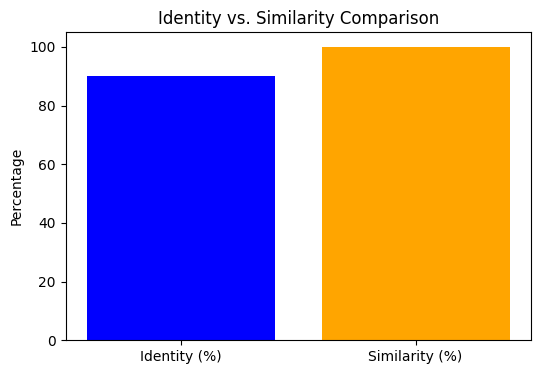

In [26]:
from Bio.Align import substitution_matrices
from Bio import pairwise2
import matplotlib.pyplot as plt

seq1 = "MVLSPADKTN"
seq2 = "MVLTPADKTN"

alignments_identity = pairwise2.align.globalxx(seq1, seq2)
best_id = alignments_identity[0]

identity = sum(
    a == b for a, b in zip(best_id[0], best_id[1]) if a != '-' and b != '-'
) / len(best_id[0].replace('-', '')) * 100


blosum62 = substitution_matrices.load("BLOSUM62")

alignments_sim = pairwise2.align.globalds(seq1, seq2, blosum62, -5, -1)
best_sim = alignments_sim[0]

similar_positions = 0
alignment_seq1 = best_sim[0]
alignment_seq2 = best_sim[1]

for a, b in zip(alignment_seq1, alignment_seq2):
    if a != '-' and b != '-':
        score = blosum62.get((a,b)) or blosum62.get((b,a)) or 0
        if score > 0:
            similar_positions += 1

similarity_percent = similar_positions / len(alignment_seq1.replace('-', '')) * 100


print(f"Identity: {identity:.2f}%")
print(f"Similarity (BLOSUM62 positive scores): {similarity_percent:.2f}%\n")

print("Identity Alignment:")
print(pairwise2.format_alignment(*best_id))
print("Similarity Alignment:")
print(pairwise2.format_alignment(*best_sim))

plt.figure(figsize=(6, 4))
plt.bar(
    ['Identity (%)', 'Similarity (%)'],
    [identity, similarity_percent],
    color=['blue', 'orange']
)
plt.title('Identity vs. Similarity Comparison')
plt.ylabel('Percentage')
plt.show()

---

# 3. Alignment Strategies: Global vs Local

| Feature               | Global Alignment (Needleman-Wunsch)           | Local Alignment (Smith-Waterman)                  |
|-----------------------|------------------------------------------------|---------------------------------------------------|
| Assumption            | Sequences similar over entire length           | Sequences may share only conserved regions        |
| Best for              | Closely related sequences, same length        | Domains, motifs, divergent sequences              |
| DP matrix path        | Corner to corner (0,0) → (m,n)                 | Can start/end anywhere                            |
| Terminal gaps         | Usually penalized                              | Often free                                        |


In [ ]:
from Bio.Align import PairwiseAligner
from Bio.Seq import Seq

seq1 = Seq("ACCGGT")
seq2 = Seq("ACG")

# Global alignment
aligner_global = PairwiseAligner()
aligner_global.mode = 'global'  # Set mode as property
aligner_global.match_score = 2
aligner_global.mismatch_score = -1
aligner_global.gap_score = -3

# Local alignment  
aligner_local = PairwiseAligner()
aligner_local.mode = 'local'  # Set mode as property
aligner_local.match_score = 2
aligner_local.mismatch_score = -1
aligner_local.gap_score = -3

print("Global:", aligner_global.align(seq1, seq2)[0])
print("Local: ", aligner_local.align(seq1, seq2)[0])

Global: target            0 ACCGGT 6
                  0 ||-|-- 6
query             0 AC-G-- 3

Local:  target            0 AC 2
                  0 || 2
query             0 AC 2



## Subtopic 4: Methods
### Methods for Pairwise Alignment - Part 1: Core Algorithms

Now, let’s get to the **how** of alignment. Key methods include:
- **Dot Plot**: A simple visual approach.
- **Dynamic Programming**:
  - **Needleman-Wunsch**: Global alignment (entire sequence).
  - **Smith-Waterman**: Local alignment (best regions).

**Biology Basics**:
- **Global**: Best for sequences of similar length and homologous (e.g., orthologous genes).
- **Local**: Ideal for finding shared domains in divergent proteins.

**Analogy**: Global alignment is like comparing two entire books cover-to-cover. Local alignment is like matching similar chapters across different books.

**Historical Note**: Needleman and Wunsch published their global algorithm in 1970. Smith and Waterman introduced local alignment in 1981, revolutionizing bioinformatics!

---

### Methods - Part 2: Algorithm Details

1. **Dot Matrix Method**  
   - Visual 2D matrix: dots where residues match  
   - Diagonal lines = similarity regions  
   - No gaps, excellent for repeats and inversions  
   - Limitation: manual interpretation
---

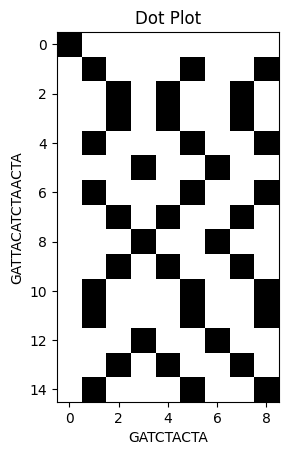

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from Bio.Seq import Seq

def dotplot(seq1, seq2):
    matrix = np.zeros((len(seq1), len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                matrix[i,j] = 1
    plt.imshow(matrix, cmap="Greys")
    plt.xlabel(seq2); plt.ylabel(seq1)
    plt.title("Dot Plot")
    plt.show()

dotplot(Seq("GATTACATCTAACTA"), Seq("GATCTACTA"))

**Dynamic Programming**:
- Builds a scoring matrix.
- Each cell holds the score of the best alignment up to that point.
- Needleman-Wunsch formula:
$$ S(i,j) = \max \begin{cases} 
S(i-1,j-1) + \text{match/mismatch score} \\
S(i-1,j) + \text{gap penalty} \\
S(i,j-1) + \text{gap penalty}
\end{cases} $$
- Complexity: $$ O(nm) $$, where \( n \), \( m \) are sequence lengths.    

The matrix is filled, and backtracking finds the optimal alignment.


Global Alignment:
MVLSPA--DKT-NV-KAAWGKV-GA-HAG-EYGAEALERMFL-SFPTTKTYFPHFDL-S
||||    ||  |  ||||||  |  | | |||||||||||  |||||||||||||  |
MVLS--GEDK-SN-IKAAWGK-IG-GH-GAEYGAEALERMF-ASFPTTKTYFPHFD-VS
  Score=41

Local Alignment:
MVLSPA--DKT-NV-KAAWGKV-GA-HAG-EYGAEALERMFL-SFPTTKTYFPHFDL-S
||||    ||  |  ||||||  |  | | |||||||||||  |||||||||||||  |
MVLS--GEDK-SN-IKAAWGK-IG-GH-GAEYGAEALERMF-ASFPTTKTYFPHFD-VS
  Score=41



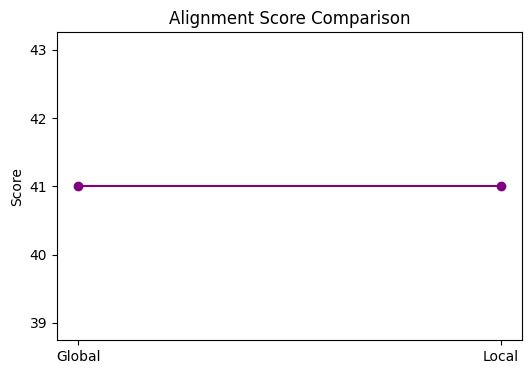

In [8]:
from Bio import Entrez, SeqIO, pairwise2
import matplotlib.pyplot as plt

# Fetch protein sequences: Human and Mouse hemoglobin
handle_human = Entrez.efetch(db="protein", id="P69905", rettype="fasta", retmode="text")
seq_human = SeqIO.read(handle_human, "fasta")
handle_mouse = Entrez.efetch(db="protein", id="NP_032244", rettype="fasta", retmode="text")
seq_mouse = SeqIO.read(handle_mouse, "fasta")

# Global and local alignment (first 50 amino acids)
align_global = pairwise2.align.globalxx(seq_human.seq[:50], seq_mouse.seq[:50])
align_local = pairwise2.align.localxx(seq_human.seq[:50], seq_mouse.seq[:50])

# Print
print("Global Alignment:")
print(pairwise2.format_alignment(*align_global[0]))
print("Local Alignment:")
print(pairwise2.format_alignment(*align_local[0]))

# Visualize: Score comparison
scores = [align_global[0][2], align_local[0][2]]
plt.figure(figsize=(6, 4))
plt.plot(['Global', 'Local'], scores, marker='o', color='purple')
plt.title('Alignment Score Comparison')
plt.ylabel('Score')
plt.show()

e.g :    
Seq1: "ABCDEFGHIJ"    
Seq2: "XYCDEFZ"    

**Global**:     
ABCDEFGHIJ  
| | | | | |     
XYCDEFZ---  

**Local**:  
CDEF    
| | | |    
CDEF    

---

## Subtopic 5: Scoring Matrices and Gap Penalties

**Substitution Matrices**

| Matrix | Origin                                 | Best for                     |
|--------|----------------------------------------|------------------------------|
| PAM    | Observed mutations in closely related proteins (Dayhoff) | Evolutionary distance modeling |
| BLOSUM | Conserved blocks in distant sequences (Henikoff)        | General use (BLOSUM62 default) |

**Gap Penalties**  
- **Open gap penalty**: cost of starting a gap (e.g., −10)  
- **Extend gap penalty**: cost of extending a gap (e.g., −0.5)  
→ Affine gap penalty = more biologically realistic

**Biopython loading**
```python
from Bio.Align import substitution_matrices
matrix = substitution_matrices.load("BLOSUM62")
print(matrix["W","W"])   # +11 (tryptophan match)

## Subtopic 6: Statistical Significance of Sequence Alignment
### Statistical Significance of Sequence Alignment

### **P-value in Bioinformatics**

The **P-value** represents the probability that an observed alignment score, or one even better, could occur **purely by random chance** rather than reflecting a genuine biological relationship between the sequences.  
It provides a measure of **statistical significance** for sequence alignments.

---

### **Mathematical Definition**

For a given alignment score \( S \), the probability that a random alignment produces a score **greater than or equal to** \( x \) is approximately:

$$
P(S \ge x) = 1 - e^{-K m n e^{-\lambda x}} \approx K m n e^{-\lambda x}
$$

Where:

| Symbol | Meaning |
|:--:|:--|
| \( S \) | Alignment score |
| \( x \) | Threshold score |
| \( K \), \( $\lambda $\) | Statistical parameters determined by the scoring system |
| \( m, n \) | Effective lengths of the two sequences |
| \( e \) | Base of the natural logarithm (\( \approx 2.718 \)) |

---

### **Interpretation**

A **low P-value** indicates that the observed alignment is **unlikely to have occurred by chance**, suggesting a **biologically meaningful similarity** between the sequences.

Typical interpretation ranges:

| P-value range | Biological interpretation |
|----------------|---------------------------|
| $ < 10^{-100} $ | Exact match |
| $ 10^{-50}  to  10^{-100} $ | Nearly identical sequences |
| $ 10^{-5}  to  10^{-50} $ | Clear homology |
| $ 10^{-1}  to  10^{-5} $ | Possible distant homologs |
| $ > 10^{-1} $ | Likely random similarity |

---

$$\Huge\text{Thank you for your attention!}$$

---